In [182]:
"""
Arjun Srivastava
arj1
AMATH 301 B
"""

import numpy as np
import scipy.linalg
import scipy.optimize
import matplotlib.pyplot as plt
import time
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [32]:
# Problem 1

# a)

# Function to generate discrete Poisson matrix of given dimension
def discrete_poisson(dim: int):
    A = np.zeros((dim, dim))
    np.fill_diagonal(A, 2), np.fill_diagonal(A[1:], -1), np.fill_diagonal(A[:, 1:], -1)
    return A

A = discrete_poisson(1000)
D = np.diag(np.diag(A))
U = np.triu(A, 1)
L = np.tril(A, -1)

# Returns minimum eigenvalue because section search methods can only find the minima. This method allows me to flip the function
def max_eig(omega: float):
    P = ((1/omega) * D) + L
    T = (((omega - 1)/omega) * D) + U
    M = -scipy.linalg.solve(P, T)
    w, V = np.linalg.eig(M)
    return -np.max(np.abs(w))

"""
We cannot use Newton's method for this problem because it requires the function to be differentiable. The function to find the 
maximum eigenvalue, however, uses matrices and is not differentiable. As such, we must use a different method to find the maximum.
"""

# Section Search

t0 = time.time()
a = 1
b = 2
c = 0.5001
tolerance = 1e-8

for k in range(100):
    x = c * a + (1 - c) * b
    y = (1 - c) * a + c * b
    
    if max_eig(x) < max_eig(y):
        b = y
    else:
        a = x
    
    if (b - a) < tolerance:
        break
t1 = time.time()
ttime = t1 - t0
        
print('Section Search:', x, k, ttime, sep='\n')

"""
A114:
k = 26
time = 0.6003904342651367
omega = 1.0000000074879227

A1000:
k = 26
time = 85.3413507938385
omega = 1.0000007255143664
"""

# Golden Section Search

t0 = time.time()
a = 1
b = 2
c = (-1 + np.sqrt(5)) / 2

x = c * a + (1 - c) * b
fx = max_eig(x)
y = (1 - c) * a + c * b
fy = max_eig(y)
for k in range(100):
    if fx < fy:
        b = y
        y = x
        fy = fx
        x = c * a + (1 - c) * b
        fx = max_eig(x)
    else:
        a = x
        x = y
        fx = fy
        y = (1 - c) * a + c * b
        fy = max_eig(y)
    if (b - a) < tolerance:
        break 
t1 = time.time()
ttime = t1 - t0
        
print('\n', 'Golden Section Search:', x, k, ttime, sep='\n')

"""
A114:
k = 38
time = 0.43085408210754395
omega = 1.000000002700889

A1000:
k = 38
time = 63.05891537666321
omega = 1.000000002700889
"""

"""
With a 1000x1000 sized Poisson matrix, the normal section search method takes 85.34 seconds and the golden section search takes
63.06 seconds. While the difference of .2 seconds beetween the two methods for the 114x114 matrix was not very significant, this
difference of ~20 seconds reinforces the idea that the golden section method is more efficient. The number
of steps required to find the maximum is greater for the golden section method (38 vs. 26 for the section method), but the time
difference is much more significant.
"""

Section Search:
1.0000007255143664
26
85.3413507938385


Golden Section Search:
1.000000002700889
38
63.05891537666321


'\nA114:\nk = 38\ntime = 0.43085408210754395\nomega = 1.000000002700889\n\nA1000:\nk = \ntime = \nomega = \n'

1.5647333556076446
1.5649558448108543


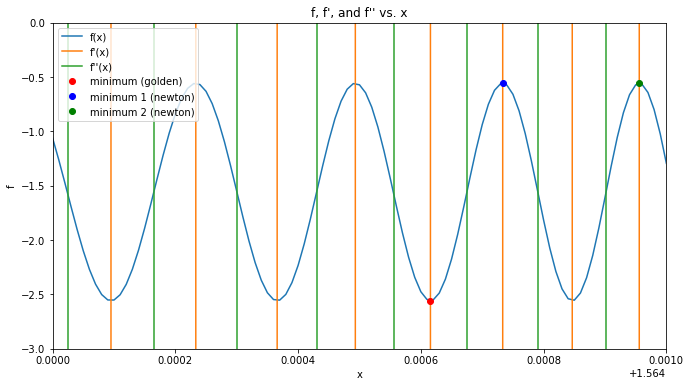

In [116]:
# b)

# Used Wolfram Alpha
f = lambda x : np.sin(np.tan(x)) - np.tan(np.sin(x))
fprime = lambda x : (1/np.cos(x)**2) * np.cos(np.tan(x)) - np.cos(x) * (1/np.cos(np.sin(x))**2)
fdprime = lambda x : -(1/np.cos(x)**2) * ((1/np.cos(x)**2) * np.sin(np.tan(x)) - 2 * np.tan(x)*np.cos(np.tan(x))) - (1/np.cos(np.sin(x)**2) * (2 * np.cos(x)**2 * np.tan(np.sin(x)) - np.sin(x))) 

# Golden Section Search

tolerance = 1e-16
a = 1.5646
b = 1.5647
c = (-1 + np.sqrt(5)) / 2

x = c * a + (1 - c) * b
fx = f(x)
y = (1 - c) * a + c * b
fy = f(y)
for k in range(100):
    if fx < fy:
        b = y
        y = x
        fy = fx
        x = c * a + (1 - c) * b
        fx = f(x)
    else:
        a = x
        x = y
        fx = fy
        y = (1 - c) * a + c * b
        fy = f(y)
    if (b - a) < tolerance:
        break 

# x = 1.5646156310416386
# min = -2.55734229768688

# Newtons method

# Function assumes f, f', and f
def newtons_method(guesses: int, x0: float, tolerance: float):
    X = np.zeros(guesses + 1)
    X[0] = x0
    for k in range(guesses):
        X[k + 1] = X[k] - fprime(X[k]) / fdprime(X[k])
        if np.abs(fprime(X[k + 1])) < tolerance:
            break
    X = X[:(k+2)]
    return X[len(X)-1]

final_guess1 = newtons_method(100, 1.5647, tolerance)
final_guess2 = newtons_method(100, 1.5648, tolerance)
print(final_guess1, final_guess2, sep='\n')

"""
After trying numerous different guesses, I have included the most interesting guess results. In the graph below, it is clear that
the golden section search method found the correct result. With Newton's method, however, guessing with the result of the golden
section search yielded the correct minimum, but using guesses 1.5647 and 1.5648 yielded incorrect maxima and minima, as shown
in the graph. Due to the incredibly small window between inflections, this is to be expected since the Newton method does not include
bounds. If we make a guess even slighly out of the 1.5646 and 1.5647 window, the function converges to the wrong x value.
Even though my 1.5647 guess is at the outer bound, the function still converged to the next extreme, and the same thing happened
with my other guess. It seems like Newton's method is not very effective for solving trig functions or other functions with very
small wavelengths (like f in this problem). The only case where Newton's method would work is if we made a very accurate initial
guess.
"""

# Plots

xs = np.arange(1.56, 1.57, .00001)
plt.figure(figsize=(11, 6))
plt.title("f, f', and f'' vs. x")
plt.plot(xs, f(xs), xs, fprime(xs), xs, fdprime(xs), x, f(x), 'ro', final_guess1, f(final_guess1), 'bo', final_guess2, f(final_guess2), 'go')
plt.ylim(-3, 0)
plt.xlim(1.564, 1.565)
plt.xlabel('x')
plt.ylabel('f')
plt.legend(("f(x)", "f'(x)", "f''(x)", "minimum (golden)", 'minimum 1 (newton)', 'minimum 2 (newton)'))

-2.9093211893625717e+42

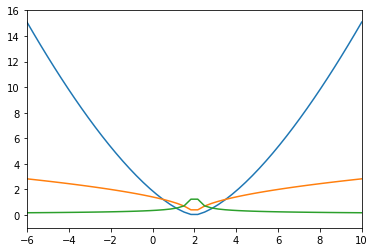

In [165]:
# c)

f = lambda x : (2/3)*np.abs(x-2)**(3/2)
fprime = lambda x : np.sqrt(np.abs(x-2))
fdprime = lambda x : (1/2)*np.abs(x-2)**(-1/2)

guess1 = newtons_method(90, 3, tolerance)
xs = np.linspace(-6, 10, 50)
plt.plot(xs, f(xs), xs, fprime(xs), xs, fdprime(xs), guess1, f(guess1), 'ro')
plt.xlim(-6, 10)
plt.ylim(-1, 16)
# Graph shows no guess anywhere near the true minimum at x = 2

"""
The guess never converges. No matter how many iterations the for loop completes, the result will never reach the true minimum.
WHYyyy??
"""
guess1

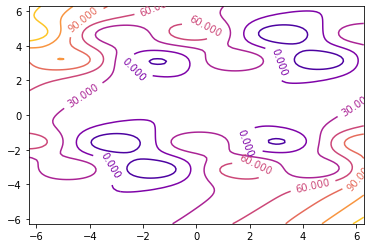

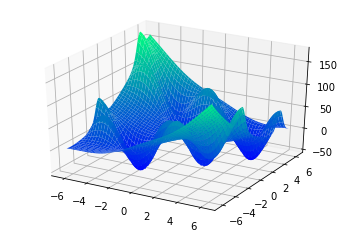

In [213]:
# Problem 2 (some letters are missing because not every part of the problem involves writing new code)

# a)

f = lambda v : np.sin(v[0])*np.exp((1-np.cos(v[1]))**2) + np.cos(y)*np.exp((1-np.sin(v[1]))**2) + (v[0]-v[1])**2

# b)

x = y = np.linspace(-2*np.pi, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)

# c)

Z = f([X, Y])

# i)

con = plt.contour(X, Y, Z, cmap=cm.plasma)
plt.clabel(con)
# xmin = scipy.optimize.minimize(f, [-2*np.pi, 2*np.pi], method='Nelder-Mead')  # UNFINISHED

# o)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', alpha=0.8)
ax.plot_surface(X, Y, Z, cmap=cm.winter)
# UNFINISHED
